### 学习曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)

In [3]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1, 1)
y = 0.5 * x** 2 + 2 + np.random.normal(0, 1, size=100)

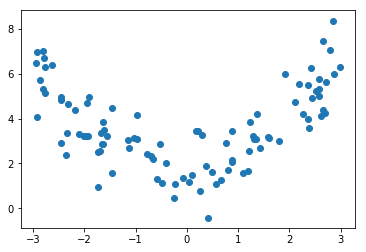

In [4]:
plt.scatter(X, y)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.shape

(75, 1)

先利用线性模型进行训练

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in  range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

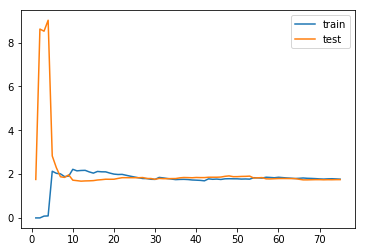

In [9]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label="train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label="test")
plt.legend()

In [10]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    
    train_score = []
    test_score = []
    
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1,  len(X_train)+1)],
            np.sqrt(test_score), label="test")
    
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])

下面的图像和上面的有些稍微不同，主要是因为，之后的比较，会在意他们之间的差距

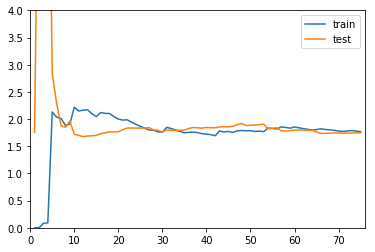

In [11]:
plot_learning_curve(LinearRegression(), X_train,X_test,y_train,y_test)

纵轴0~4, 因为不需要关心差别特别大的那一部分

### 使用多项式回归

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
def PolynomoalRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

使用二阶的多项式回归曲线得到得到的结果

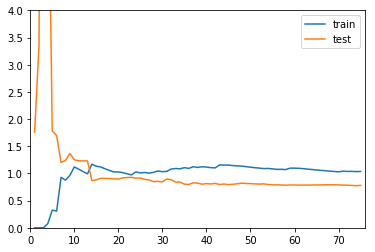

In [14]:
poly2_reg = PolynomoalRegression(degree=2)
plot_learning_curve(poly2_reg, X_train,X_test,y_train,y_test)

将多项式调整为20，然后来计算结果

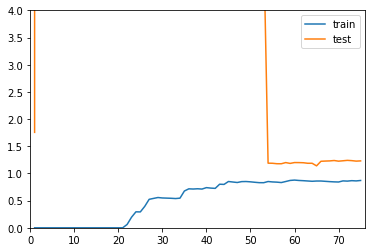

In [15]:
poly20_reg = PolynomoalRegression(degree=20)
plot_learning_curve(poly20_reg, X_train,X_test,y_train,y_test)

学习曲线的总结

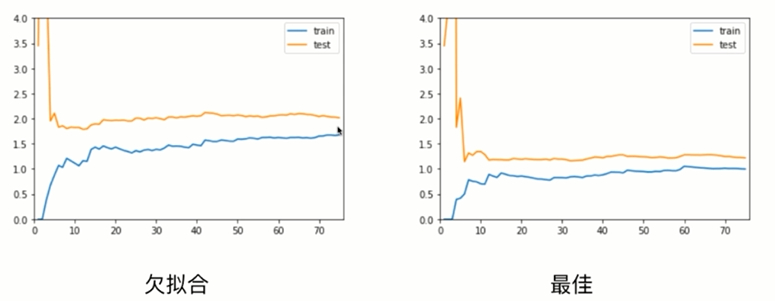

无论对于测试数据集还是训练数据集，误差都比较大，说明模型本身选择就不对，说以在训练数据集是行，误差也是非常大的

上面的都是通过train和test来看模型的泛化能力的